In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [51]:
df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40
5,6,Female,22.0,17.0,76
6,7,Female,35.0,18.0,6
7,8,Female,23.0,18.0,94
8,9,Male,64.0,19.0,3
9,10,Female,NaN,19.0,72


### (a) Chargement et aperçu des données 
 - Charger le dataset "Mall_Customers_modified.csv". 
 - Afficher les cinq dernières lignes du dataset. 
 - Décrire brièvement le dataset : 
 - Combien de colonnes et de lignes contient-il ? 
 - Quelles sont les colonnes présentes et leurs types de données ?

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     160 non-null    float64
 3   Annual Income (k$)      188 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


### (b) Prétraitement des données

In [53]:
df = df.drop(columns=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   200 non-null    object 
 1   Age                     160 non-null    float64
 2   Annual Income (k$)      188 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 6.4+ KB


In [54]:
# Encoder la variable catégorielle 'Genre' en utilisant  un encodage numérique où 'Male' est représenté par 0 et 'Female' par 1.
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
df.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19.0,15.0,39
1,0,21.0,15.0,81
2,1,20.0,16.0,6
3,1,23.0,16.0,77
4,1,31.0,17.0,40
5,1,22.0,17.0,76
6,1,35.0,18.0,6
7,1,23.0,18.0,94
8,0,64.0,19.0,3
9,1,NaN,19.0,72


In [55]:
# valeurs manquantes - affichage avant/après
print("Avant:\n", df.isna().sum())

# remplir 'Annual Income (k$)' si nécessaire (assigner le résultat)
df['Annual Income (k$)'] = df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].median())
print("Après:\n\n", df.isna().sum())

Avant:
 Genre                      0
Age                       40
Annual Income (k$)        12
Spending Score (1-100)     0
dtype: int64
Après:

 Genre                      0
Age                       40
Annual Income (k$)         0
Spending Score (1-100)     0
dtype: int64


In [ ]:

print("Avant:\n", df.isna().sum())
# remplir 'Age' par la médiane du groupe 'Genre'
# df['Age'] = df.groupby('Genre')['Age'].apply(lambda g: g.fillna(g.median()))

# si certaines valeurs restent NaN (p. ex. groupe entièrement NaN), remplir par la médiane globale
df['Age'] = df['Age'].fillna(df['Age'].median())

print("Après:\n\n", df.isna().sum())
df

Avant:
 Genre                      0
Age                       40
Annual Income (k$)         0
Spending Score (1-100)     0
dtype: int64
Après:

 Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19.0,15.0,39
1,0,21.0,15.0,81
2,1,20.0,16.0,6
3,1,23.0,16.0,77
4,1,31.0,17.0,40
...,...,...,...,...
195,1,35.0,120.0,79
196,1,45.0,126.0,28
197,0,32.0,126.0,74
198,0,32.0,137.0,18


In [ ]:
df.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.330000,60.590000,50.200000
std,0.497633,12.440859,25.622048,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,31.000000,43.000000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,47.000000,77.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [72]:
# EDA steps to run BEFORE normalization (use existing `df`)
# 1) Basic summaries and missing values
df.shape


(200, 4)

In [73]:
df.dtypes


Genre                       int64
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object

In [74]:
df.isna().sum()


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Genre,200.0,0.56,0.497633,0.0,0.00,1.0,1.0,1.0
Age,200.0,38.33,12.440859,18.0,31.00,36.0,47.0,70.0
Annual Income (k$),200.0,60.59,25.622048,15.0,43.00,61.5,77.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0



Genre distribution:
 Genre
1    112
0     88
Name: count, dtype: int64

Numeric columns: ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Skewness:
 Genre                    -0.243578
Age                       0.681453
Annual Income (k$)        0.346476
Spending Score (1-100)   -0.047220
dtype: float64

Kurtosis:
 Genre                    -1.960375
Age                       0.003722
Annual Income (k$)        0.123112
Spending Score (1-100)   -0.826629
dtype: float64

Correlation matrix:
                            Genre       Age  Annual Income (k$)  \
Genre                   1.000000 -0.023506           -0.051464   
Age                    -0.023506  1.000000           -0.022700   
Annual Income (k$)     -0.051464 -0.022700            1.000000   
Spending Score (1-100)  0.058109 -0.271103            0.043825   

                        Spending Score (1-100)  
Genre                                 0.058109  
Age                                  -0.271103  
Annual Inco

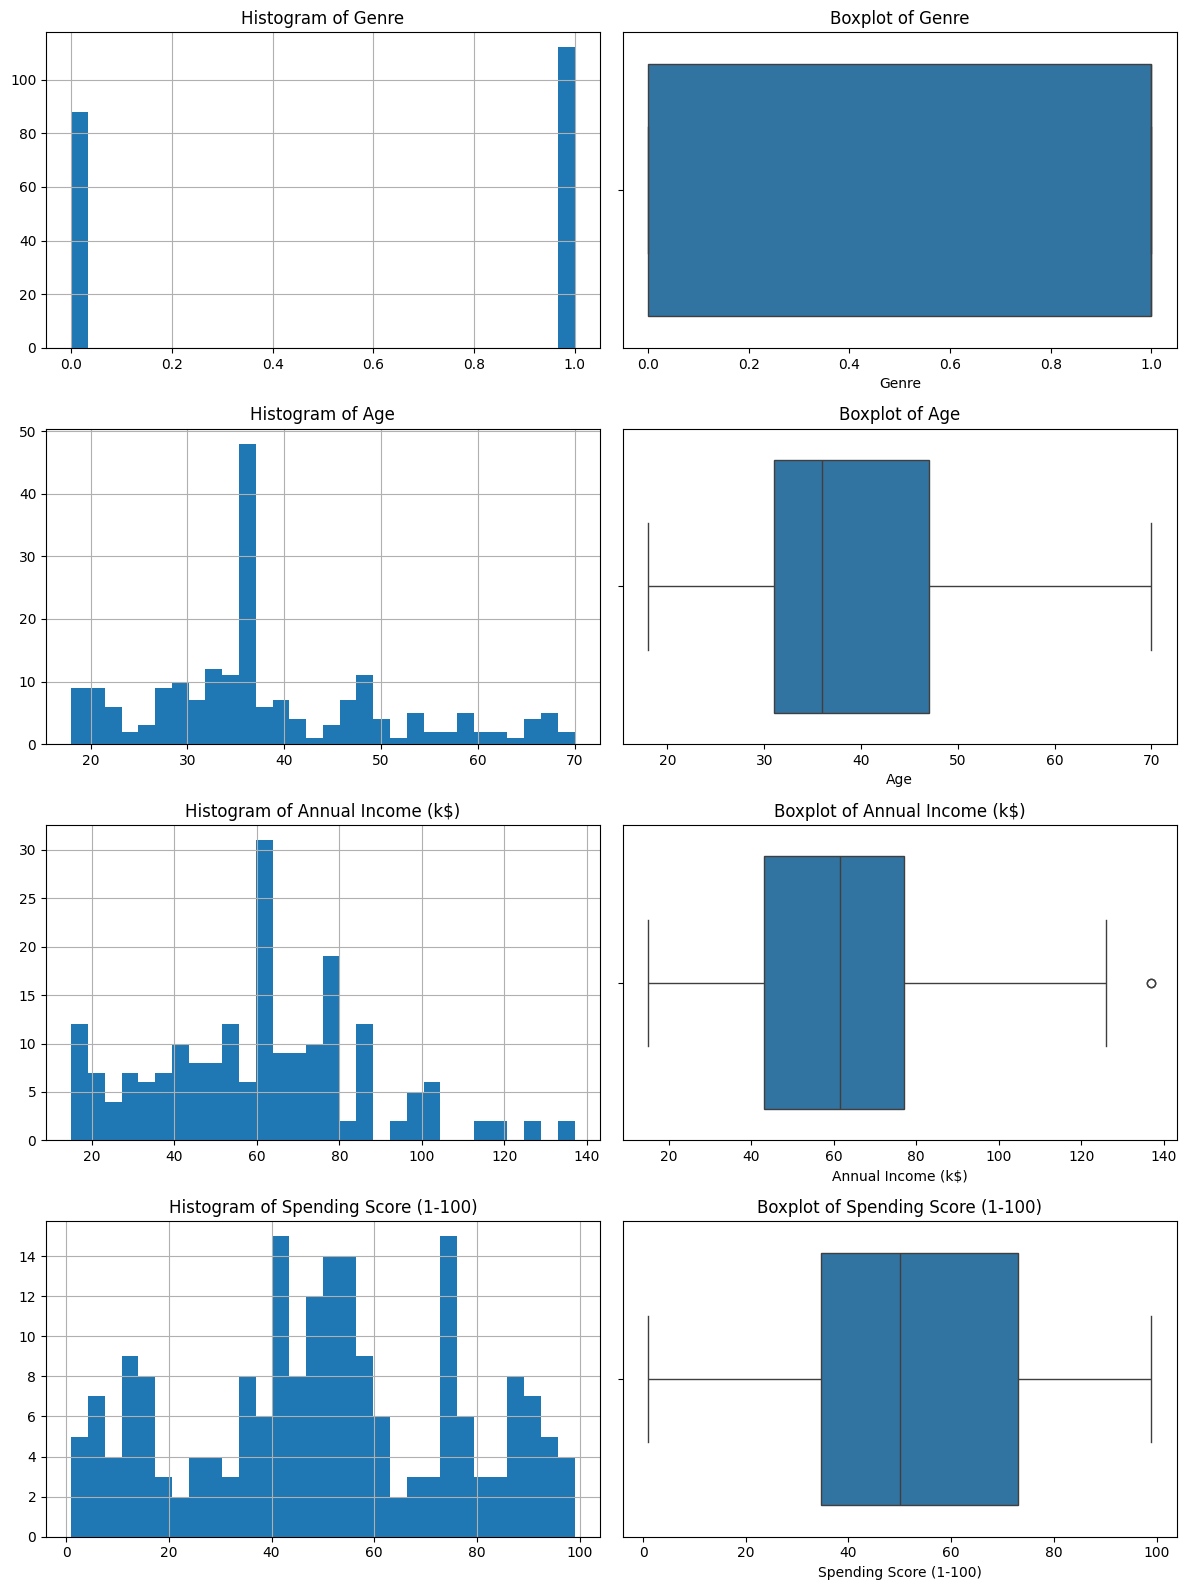

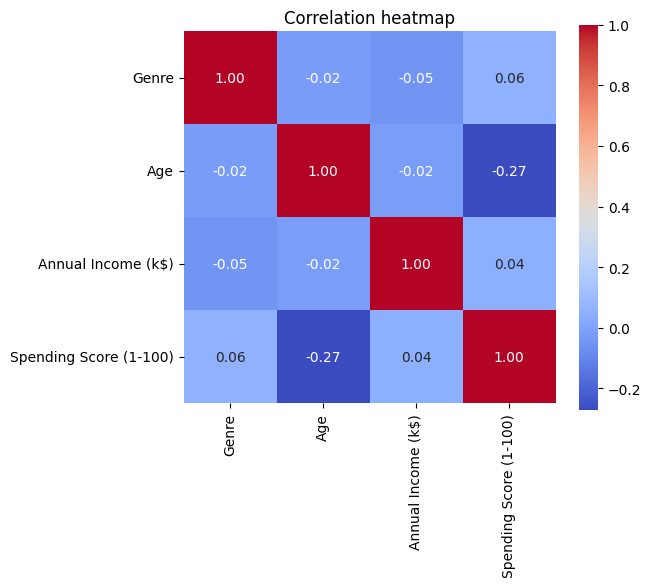

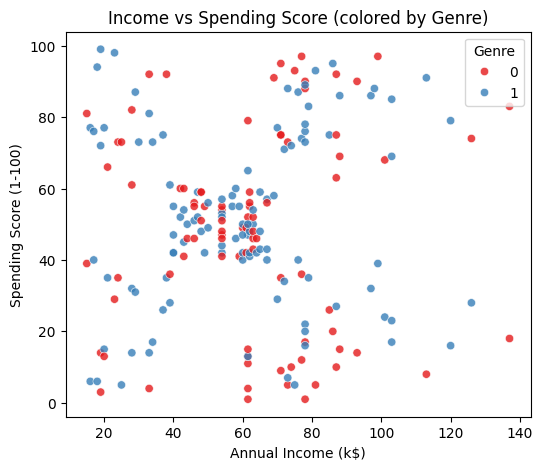

In [69]:
# 2) Check class balance for categorical columns
if 'Genre' in df.columns:
    print("\nGenre distribution:\n", df['Genre'].value_counts(normalize=False))

# 3) Numeric columns, skewness and kurtosis
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:", num_cols)
print("\nSkewness:\n", df[num_cols].skew())
print("\nKurtosis:\n", df[num_cols].kurtosis())

# 4) Univariate plots (histograms + boxplots) to inspect distributions and outliers
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 4*len(num_cols)))
for i, col in enumerate(num_cols):
    df[col].hist(bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')
plt.tight_layout()

# 5) Correlation matrix and heatmap
corr = df[num_cols].corr()
print("\nCorrelation matrix:\n", corr)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation heatmap")

# 6) Bivariate plots for key relationships (e.g., Income vs Spending)
if set(['Annual Income (k$)', 'Spending Score (1-100)']).issubset(df.columns):
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', palette='Set1', alpha=0.8)
    plt.title('Income vs Spending Score (colored by Genre)')

# 7) Simple outlier detection (IQR) — list counts and some example indices
outlier_info = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_info[col] = mask.sum()
    if mask.any():
        print(f"\nOutliers in {col}: {outlier_info[col]} (example indices: {df[mask].index.tolist()[:5]})")

print("\nOutlier counts per numeric column:", outlier_info)

# 8) Recommendations (to follow in pipeline, not applied here):
# - If heavy skewness: consider log1p / Box-Cox / Yeo-Johnson on skewed features.
# - Treat outliers: winsorize, remove, or keep depending on context.
# - Encode categorical(s) properly (Genre already numeric).
# - Split data into train/validation/test BEFORE fitting scalers; fit scaler on TRAIN only.
# After doing the above cleaning/transformations, then apply StandardScaler (or other) to numeric features.